In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [39]:
clean_data = np.arange(1, 21, dtype=np.float32)  # Integers from 1 to 20

# Add Gaussian noise
noise = np.random.normal(0, 1, clean_data.shape).astype(np.float32)
noisy_data = clean_data + noise

# Normalize to [0, 1]
clean_data = clean_data / 20.0
noisy_data = noisy_data / 20.0

# Convert to PyTorch tensors
clean_tensor = torch.tensor(clean_data).unsqueeze(1)  # Shape: (20, 1)
noisy_tensor = torch.tensor(noisy_data).unsqueeze(1)  # Shape: (20, 1)

***Shallow DAE***

In [40]:
class shallow_DenoisingAutoencoder(nn.Module):
    def __init__(self,h_dim):
        super(shallow_DenoisingAutoencoder, self).__init__()
        self.h_dim = h_dim
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(1, self.h_dim),
            nn.ReLU())
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(self.h_dim, 1))
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize the model
model = shallow_DenoisingAutoencoder(h_dim=16)

In [41]:
# Loss function: Mean Squared Error
criterion = nn.MSELoss()

# Optimizer: Adam
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [42]:
# Training loop
losses = []
epochs = 100
for epoch in range(epochs):
    # Forward pass
    outputs = model(noisy_tensor)
    loss = criterion(outputs, clean_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 50 epochs
    losses.append(loss.item())
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [50/100], Loss: 0.0103
Epoch [100/100], Loss: 0.0016


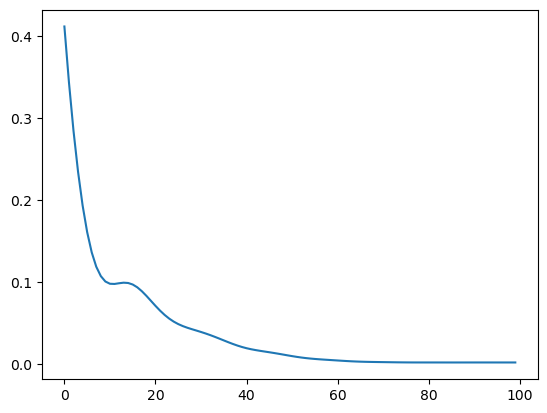

In [43]:
plt.plot(losses)

In [44]:
# Denoise the data
with torch.no_grad():  # Disable gradient computation
    denoised_tensor = model(noisy_tensor)
clean_data_rescaled = clean_tensor.numpy() * 20.0
noisy_data_rescaled = noisy_tensor.numpy() * 20.0
denoised_data_rescaled = denoised_tensor.numpy() * 20.0

error = abs(noisy_data_rescaled-clean_data_rescaled)
new_error = abs(denoised_data_rescaled-clean_data_rescaled)
print(np.mean(error**2))
print(np.mean(new_error**2))

0.72445476
0.6452373


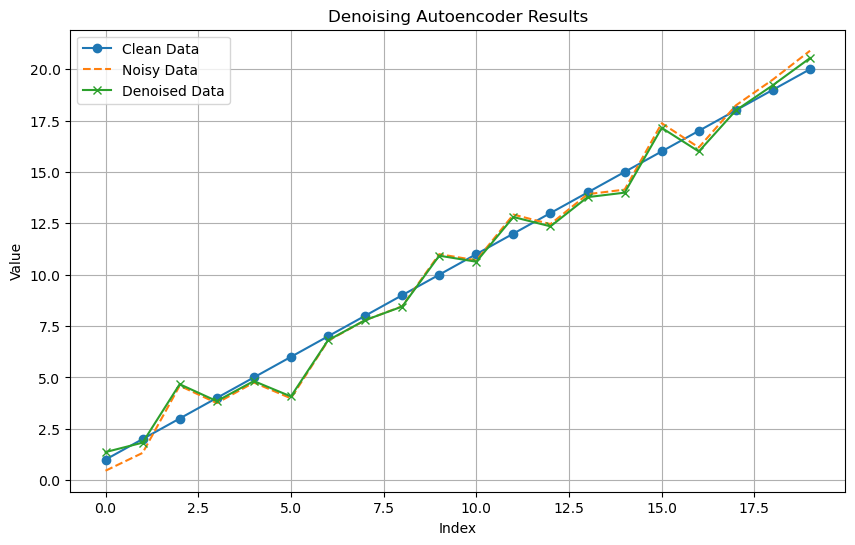

In [45]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(clean_data_rescaled, label="Clean Data", marker='o')
plt.plot(noisy_data_rescaled, label="Noisy Data", linestyle='dashed')
plt.plot(denoised_data_rescaled, label="Denoised Data", marker='x')
plt.legend()
plt.title("Denoising Autoencoder Results")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid()
plt.show()

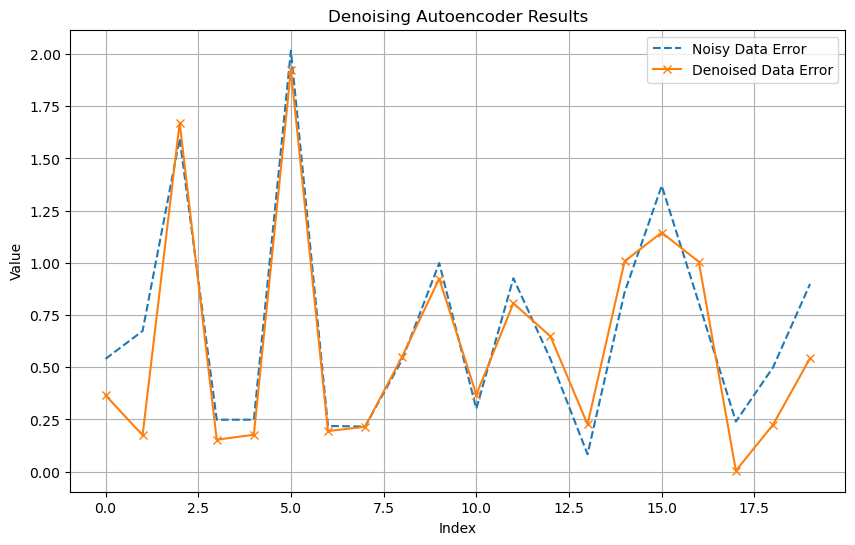

In [46]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(error, label="Noisy Data Error", linestyle='dashed')
plt.plot(new_error, label="Denoised Data Error", marker='x')
plt.legend()
plt.title("Denoising Autoencoder Results")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid()
plt.show()

***Deep DAE***

In [47]:
class deep_DenoisingAutoencoder(nn.Module):
    def __init__(self,h_dim):
        super(deep_DenoisingAutoencoder, self).__init__()
        self.h_dim = h_dim
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(1, self.h_dim//2),
            nn.ReLU(),
            nn.Linear(self.h_dim//2,self.h_dim),
            nn.ReLU())
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(self.h_dim,self.h_dim//2),
            nn.ReLU(),
            nn.Linear(self.h_dim//2, 1))
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize the model
model = deep_DenoisingAutoencoder(h_dim=4)

In [48]:
# Loss function: Mean Squared Error
criterion = nn.MSELoss()

# Optimizer: Adam
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [49]:
# Training loop
losses = []
epochs = 300
for epoch in range(epochs):
    # Forward pass
    outputs = model(noisy_tensor)
    loss = criterion(outputs, clean_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 50 epochs
    losses.append(loss.item())
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [50/300], Loss: 0.0831
Epoch [100/300], Loss: 0.0831
Epoch [150/300], Loss: 0.0831
Epoch [200/300], Loss: 0.0831
Epoch [250/300], Loss: 0.0831
Epoch [300/300], Loss: 0.0831


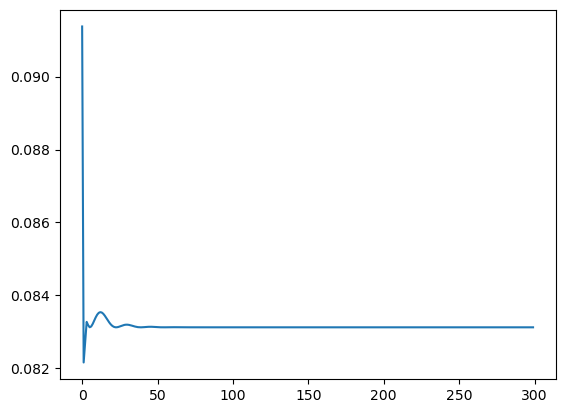

In [50]:
plt.plot(losses)

In [51]:
# Denoise the data
with torch.no_grad():  # Disable gradient computation
    denoised_tensor = model(noisy_tensor)
clean_data_rescaled = clean_tensor.numpy() * 20.0
noisy_data_rescaled = noisy_tensor.numpy() * 20.0
denoised_data_rescaled = denoised_tensor.numpy() * 20.0

error = abs(noisy_data_rescaled-clean_data_rescaled)
new_error = abs(denoised_data_rescaled-clean_data_rescaled)
print(np.mean(error**2))
print(np.mean(new_error**2))

0.72445476
33.25


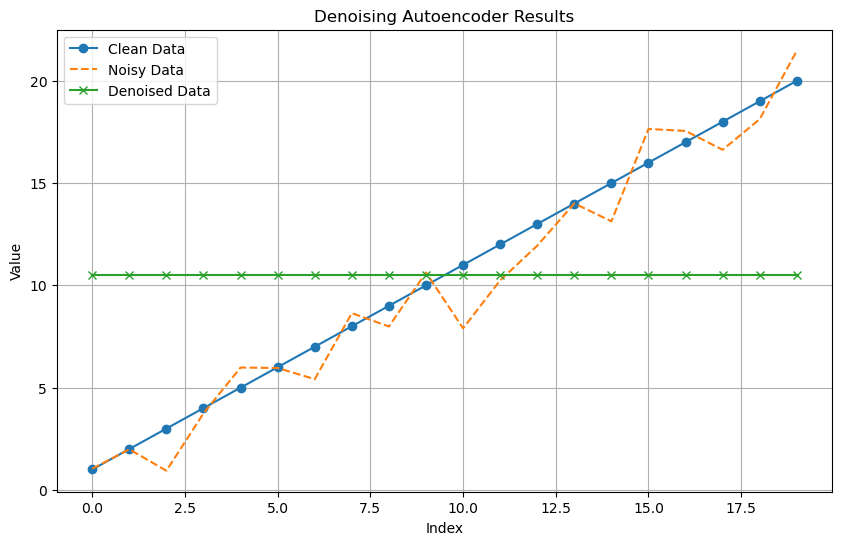

In [29]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(clean_data_rescaled, label="Clean Data", marker='o')
plt.plot(noisy_data_rescaled, label="Noisy Data", linestyle='dashed')
plt.plot(denoised_data_rescaled, label="Denoised Data", marker='x')
plt.legend()
plt.title("Denoising Autoencoder Results")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid()
plt.show()

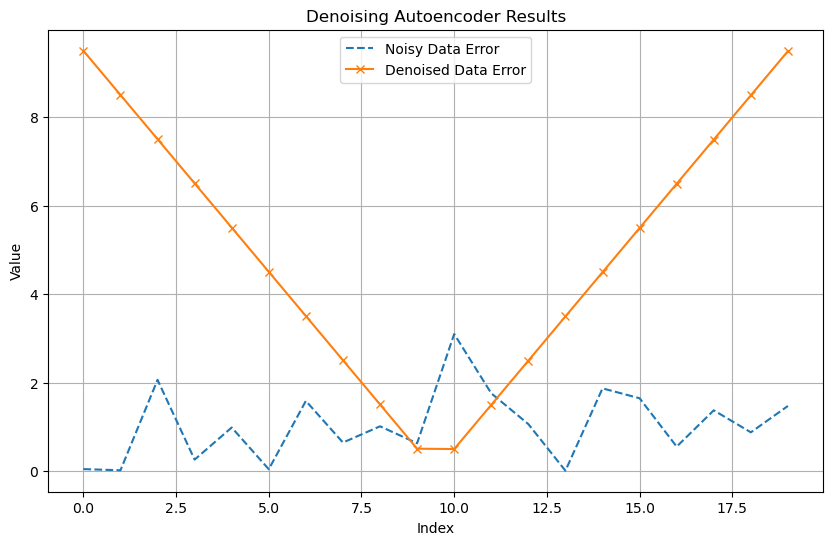

In [16]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(error, label="Noisy Data Error", linestyle='dashed')
plt.plot(new_error, label="Denoised Data Error", marker='x')
plt.legend()
plt.title("Denoising Autoencoder Results")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid()
plt.show()

In [17]:
clean_data = np.arange(1, 21, dtype=np.float32)  # Integers from 1 to 20
noise2 = np.random.normal(0, 1, clean_data.shape).astype(np.float32)
noisy_data2 = clean_data + noise2
clean_data = clean_data / 20.0
noisy_data2 = noisy_data2 / 20.0
noisy_tensor2 = torch.tensor(noisy_data2).unsqueeze(1)  # Shape: (20, 1)

In [18]:
# Denoise the data
with torch.no_grad():  # Disable gradient computation
    denoised_tensor2 = model(noisy_tensor2)
noisy_data_rescaled2 = noisy_tensor2.numpy() * 20.0
denoised_data_rescaled2 = denoised_tensor2.numpy() * 20.0

error2 = abs(noisy_data_rescaled2-clean_data_rescaled)
new_error2 = abs(denoised_data_rescaled2-clean_data_rescaled)
print(np.mean(error2**2))
print(np.mean(new_error2**2))

1.2861731
33.25002


In [19]:
#Model could not learn removing noise

In [20]:
def Idwin():
    clean_data = np.arange(1, 21, dtype=np.float32)  # Integers from 1 to 20
    noise2 = np.random.normal(0, 1, clean_data.shape).astype(np.float32)
    noisy_data2 = clean_data + noise2
    clean_data = clean_data / 20.0
    noisy_data2 = noisy_data2 / 20.0
    noisy_tensor2 = torch.tensor(noisy_data2).unsqueeze(1)  # Shape: (20, 1)
    # Denoise the data
    with torch.no_grad():  # Disable gradient computation
        denoised_tensor2 = model(noisy_tensor2)
    noisy_data_rescaled2 = noisy_tensor2.numpy() * 20.0
    denoised_data_rescaled2 = denoised_tensor2.numpy() * 20.0
    
    error2 = abs(noisy_data_rescaled2-clean_data_rescaled)
    new_error2 = abs(denoised_data_rescaled2-clean_data_rescaled)
    return np.mean(new_error2**2) < np.mean(error2**2)

In [21]:
a = 0
for i in range(1000):
    if Idwin():
        a = a+1
print(a)

0


***Let's be more rebust***

In [119]:
class deep_DenoisingAutoencoder(nn.Module):
    def __init__(self,h_dim,drate):
        super(deep_DenoisingAutoencoder, self).__init__()
        self.h_dim = h_dim
        self.drate = drate
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(1, self.h_dim//2),
            nn.ReLU(),
            nn.Dropout(self.drate),
            nn.Linear(self.h_dim//2,self.h_dim),
            nn.ReLU(),
            nn.Dropout(self.drate))
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(self.h_dim,self.h_dim//2),
            nn.ReLU(),
            nn.Linear(self.h_dim//2, 1))
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize the model
model = deep_DenoisingAutoencoder(h_dim=16,drate=0.1)

In [145]:
class DenoisingDataset(Dataset):
    def __init__(self, num_samp):
        super().__init__()
        self.clean_data = torch.randint(1,11,(num_samp,))/10
        self.noisy_data = self.clean_data + torch.normal(mean=0,std=1,size=self.clean_data.size())/100
    def __len__(self):
        return len(self.clean_data)
    def __getitem__(self,idx):
        return self.noisy_data[idx],self.clean_data[idx]

In [171]:
traindataset = DenoisingDataset(10000)
traindataloader = DataLoader(traindataset, batch_size=10, shuffle=False)
validdataset = DenoisingDataset(100)
validdataloader = DataLoader(validdataset, batch_size=10, shuffle=False)

In [172]:
losses = []
val_losses = []
epochs = 300
patience = 50  # Stop if no improvement for this many epochs
best_val_loss = float('inf')
no_improvement_count = 0

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for noisy, clean in traindataloader:
        outputs = model(noisy.unsqueeze(1))
        loss = criterion(outputs.unsqueeze(1), clean)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(traindataloader)  # Average train loss
    losses.append(train_loss)
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for noisy, clean in validdataloader:
            outputs = model(noisy.unsqueeze(1))
            loss = criterion(outputs.unsqueeze(1), clean)
            val_loss += loss.item()
    val_loss /= len(validdataloader)  # Average validation loss
    val_losses.append(val_loss)

    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improvement_count = 0
        best_model_state = model.state_dict()  # Save the best model
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            model.load_state_dict(best_model_state)  # Restore best model
            break

    # Print progress
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

# Final message
print(f"Training completed. Best validation loss: {best_val_loss:.4f}")

Epoch [5/300], Train Loss: 0.8940, Val Loss: 1.0281
Epoch [10/300], Train Loss: 0.8953, Val Loss: 1.0281
Epoch [15/300], Train Loss: 0.8933, Val Loss: 1.0281
Epoch [20/300], Train Loss: 0.8939, Val Loss: 1.0281
Epoch [25/300], Train Loss: 0.8939, Val Loss: 1.0281
Epoch [30/300], Train Loss: 0.8940, Val Loss: 1.0281
Epoch [35/300], Train Loss: 0.8944, Val Loss: 1.0281
Epoch [40/300], Train Loss: 0.8934, Val Loss: 1.0281
Epoch [45/300], Train Loss: 0.8934, Val Loss: 1.0281
Epoch [50/300], Train Loss: 0.8941, Val Loss: 1.0281
Early stopping triggered after 51 epochs.
Training completed. Best validation loss: 1.0281
